# Introduction

In this notebook, four treatment methods will be compared as potential treatments for squamous cell carcinoma (SCC):
* Capomulin
* Infubinol
* Ketapril
* Placebo

In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedf = pd.read_csv(mouse_drug_data_to_load)
clindf = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mdatadf = pd.merge(clindf, mousedf, on = "Mouse ID")
# Display the data table for preview
mdatadf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVol = mdatadf.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
meanTumorVol = meanTumorVol.reset_index()

# Preview DataFrame
meanTumorVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semTumorSeries = mdatadf.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
semTumordf = pd.DataFrame(semTumorSeries).reset_index()

# Preview DataFrame
semTumordf.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [23]:
# Minor Data Munging to Re-Format the Data Frames
drugL = meanTumorVol["Drug"].unique()

timeL = meanTumorVol["Timepoint"].unique()

reformatdf = pd.DataFrame({"Timepoint":timeL})
errordf = pd.DataFrame({"Timepoint":timeL})

for drug in drugL:
    addf= meanTumorVol.loc[meanTumorVol["Drug"]==drug][["Timepoint","Tumor Volume (mm3)"]].rename(columns = {"Tumor Volume (mm3)":drug})
    reformatdf = pd.merge(reformatdf,addf, on="Timepoint")
    edf= semTumordf.loc[semTumordf["Drug"]==drug][["Timepoint","Tumor Volume (mm3)"]].rename(columns = {"Tumor Volume (mm3)":drug})
    errordf = pd.merge(errordf,edf, on="Timepoint")

reformatdf = reformatdf.set_index("Timepoint")
errordf = errordf.set_index("Timepoint")

# Preview that Reformatting worked
reformatdf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


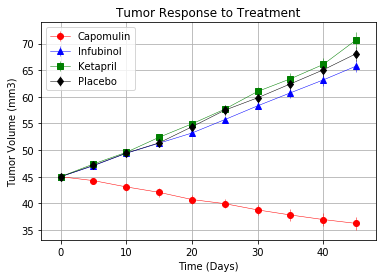

In [24]:
# Generate the Plot (with Error Bars)

treatmentL = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
treatmentD = {"Capomulin":["o","red"], "Infubinol":["^","blue"], "Ketapril":["s","green"], "Placebo":["d","black"]}


for drug in treatmentD:
    reformatdf[drug].plot(marker = treatmentD[drug][0], color = treatmentD[drug][1], linewidth = .5, 
                          yerr = errordf[drug], label=drug)
    
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-3, 48)
plt.title("Tumor Response to Treatment")
plt.legend(loc='upper left')
plt.grid("True")

# Save the Figure
imagepath = os.path.join("images","TumorResponse.png")
plt.savefig(imagepath)

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [25]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanMeta = mdatadf.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meanMeta = pd.DataFrame(meanMeta)

# Preview DataFrame
meanMeta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMeta = mdatadf.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
semMeta = pd.DataFrame(semMeta)

# Preview DataFrame
semMeta.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [27]:
# Minor Data Munging to Re-Format the Data Frames
drugL = meanMeta.reset_index()["Drug"].unique()
timeL = meanMeta.reset_index()["Timepoint"].unique()

metaSitedf = pd.DataFrame({"Timepoint":timeL})
metaErrordf = pd.DataFrame({"Timepoint":timeL})

for drug in drugL:
    addf= meanMeta.loc[drug].rename(columns = {"Metastatic Sites":drug})
    metaSitedf = pd.merge(metaSitedf,addf, on="Timepoint")
    medf = semMeta.loc[drug].rename(columns = {"Metastatic Sites":drug})
    metaErrordf = pd.merge(metaErrordf,medf, on="Timepoint")

metaSitedf = metaSitedf.set_index("Timepoint")
metaErrordf = metaErrordf.set_index("Timepoint")

# Preview that Reformatting worked
metaSitedf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


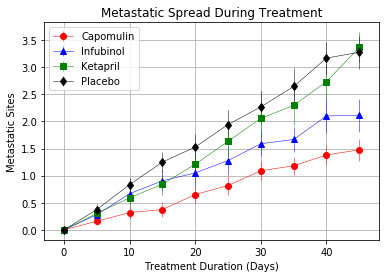

In [28]:
# Generate the Plot (with Error Bars)

for drug in treatmentD:
    metaSitedf[drug].plot(marker = treatmentD[drug][0], color = treatmentD[drug][1], linewidth = .5, 
                          yerr = metaErrordf[drug], label=drug)

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.xlim(-3, 48)
plt.title("Metastatic Spread During Treatment")
plt.legend(loc='best')
plt.grid("True")

# Save the Figure
imagepath = os.path.join("images","MetastaticSpread.png")
plt.savefig(imagepath)

# Show the Figure
plt.show()

## Survival Rates

In [29]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseCount = mdatadf.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouseCount = pd.DataFrame(mouseCount).rename(columns={"Mouse ID":"Mouse Count"}).reset_index()

# Preview DataFrame
mouseCount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [30]:
# Minor Data Munging to Re-Format the Data Frames
drugL = mouseCount["Drug"].unique()
timeL = mouseCount["Timepoint"].unique()

mdcountdf = pd.DataFrame({"Timepoint":timeL})

for drug in drugL:
    addf= mouseCount.loc[mouseCount["Drug"]==drug][["Timepoint","Mouse Count"]].rename(columns = {"Mouse Count":drug})
    mdcountdf = pd.merge(mdcountdf,addf, on="Timepoint")

mdcountdf = mdcountdf.set_index("Timepoint")

# Preview DataFrame
mdcountdf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


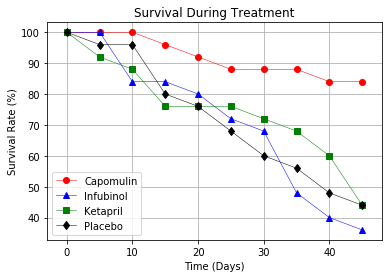

In [31]:
# Generate the Plot (Accounting for percentages)

for drug in treatmentD:
    mdcountdf[drug+" Survival Rate"] = 100 * mdcountdf[drug]/ mdcountdf.loc[0,drug]
    mdcountdf[drug+" Survival Rate"].plot(marker = treatmentD[drug][0], color = treatmentD[drug][1], 
                                          linewidth = .5, label=drug)

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(-3, 48)
plt.title("Survival During Treatment")
plt.legend(loc='best')
plt.grid("True")

# Save the Figure
imagepath = os.path.join("images","SurvivalRates.png")
plt.savefig(imagepath)

# Show the Figure
plt.show()

## Summary Bar Graph

In [32]:
# Calculate the percent changes for each drug
tumorVolChanges = 100 * (reformatdf.iloc[-1] - reformatdf.iloc[0])/reformatdf.iloc[0]

# Display the data to confirm
tumorVolChanges

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

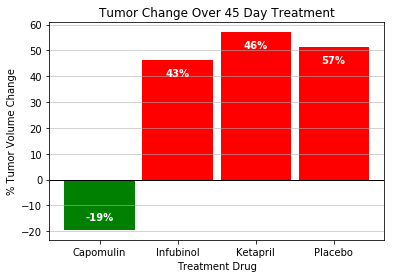

In [33]:
# Store all Relevant Percent Changes into a Tuple
tumorTreatment = tumorVolChanges[treatmentL]

# Check the % Tumor Volume Change for all the Treatment Drugs
colors = ['green' if (x < 0) else 'red' for x in tumorVolChanges]


# Splice the data between passing and failing drugs

myplot = plt.bar(treatmentL, tumorTreatment, width = .9, color = colors)
plt.grid(axis='y', alpha = .7)
plt.xlabel("Treatment Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

plt.axhline(linewidth=1, color='black' )

# Use functions to label the percentages of changes
def labelbar(bar, label, **kwargs):
    height = bar.get_height()
    if not 'pos' in kwargs:
        pos = "top"
    else:
        pos = kwargs["pos"]
    offset = 5*abs(height)/height
    if (pos == "top"):
        placement = height-offset
    else:
        placement = offset
    plt.text(bar.get_x() + bar.get_width() / 2, placement, label,
            ha='center', va='center', color="white", fontweight=800)

# Make some labels.
labels = [str(int(round(p))) + "%" for p in tumorVolChanges]

# Call functions to implement the function calls
for bar, label in zip(myplot, labels):
    labelbar(bar, label)

# Save the Figure
imagepath = os.path.join("images","TumorChangeOverTreatment.png")
plt.savefig(imagepath)

# Show the Figure
plt.show()

# Summary
Three factors in the data were studied to determine drug efficacy and safety in treating squamous cell carcinoma (SCC). These were as follows:

* Tumor response to treatment measured as mean percent growth/reduction in tumor volume
* Metastatic spread during treatment measured as mean percent increase in metastatic sites
* Survival rate measured as percent of treated population alive during treatment duration

Of the 4 treatment methods, only one showed success with tumor volume reduction: Capomulin (-19.48%). 
Capomulin also showed the least increase in metastatic sites over the treatment duration (+1.48).
Capomulin treatment produced the highest survival rates as well, with 84% at treatment duration.

Capomulin stands out clearly from the other treatment methods considered in this notebook (Infubinol, Ketapril, and Placebo) with tumor volume reduction, least metastatic spread, and highest survival rate. However, other data included in the data set indicated another treatment method, Ramicane, might prove promising for SCC treatment as well. To consider the complete field of comparators, please see the notebook "pymaceuticals_all.ipynb".